In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple
%matplotlib inline

In [2]:
def parse_update_time_results(filename:str) -> pd.DataFrame:
    with open(filename) as f:
        lines = f.readlines()[2:] # first two lines not needed
    ignore_from_idx = lines.index("PROPERTIES:\n")
    results = lines[:ignore_from_idx-1] # there is an empty line preceding the ignore_from_idx
    results_clean = [r.strip("\n") for r in results]
    results_df = pd.DataFrame(sub.split("\t") for sub in results_clean[1:])
    results_df.columns = results_clean[0].split("\t")
    results_df.rename(columns={"InU" : "InputCardinality"}, inplace=True)
    for col in ["InputCardinality", "Trials", "nS/Set"]:
        results_df[col] = pd.to_numeric(results_df[col])
    return results_df

In [10]:
bf_update_speeds = parse_update_time_results("BloomFilterUpdateSpeedProfile20240605_043733PST.txt")
qf_update_speeds_old = parse_update_time_results("QuotientFilterUpdateSpeedProfile20240605_043500PST.txt")
qf_update_speeds_new = parse_update_time_results("QuotientFilterUpdateSpeedProfile20240626_020824PST.txt")


In [11]:
merged_df = pd.merge(qf_update_speeds_old, qf_update_speeds_new, on="InputCardinality", suffixes=("_old", "_new"))
merged_df

,InputCardinality,Trials_old,nS/Set_old,Trials_new,nS/Set_new
0,1,4096,3360.827148,4096,4158.834717
1,2,4096,281.958862,4096,510.322266
2,3,4096,36.983643,4096,31.661133
3,4,4096,29.807861,4096,233.816650
4,5,4096,31.970068,4096,30.608398
...,...,...,...,...,...
264,808563,70,70.009269,70,81.114185
265,844361,69,78.577323,69,92.584145
266,881744,68,93.375629,68,108.523608
267,920782,67,118.705650,67,143.144534


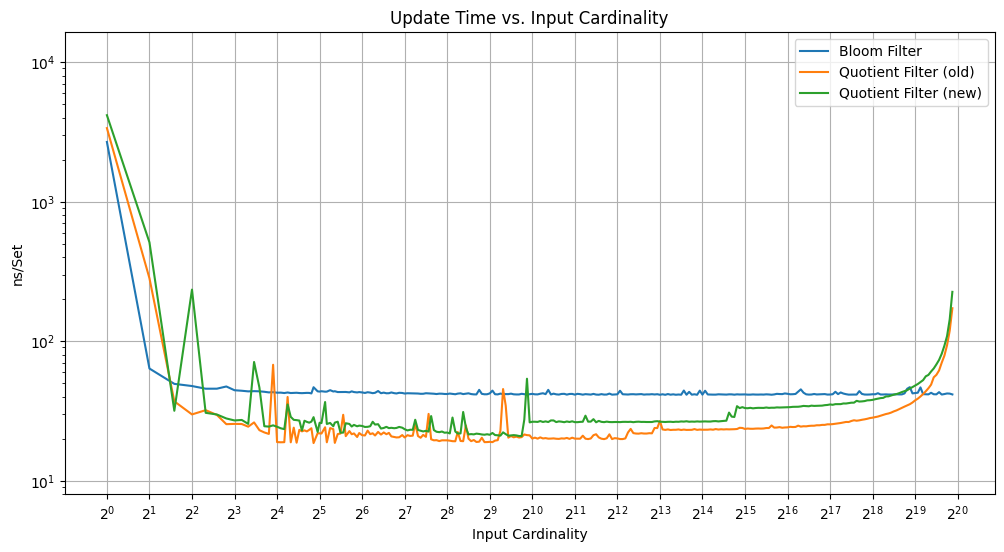

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(bf_update_speeds["InputCardinality"], bf_update_speeds["nS/Set"], label="Bloom Filter")
ax.plot(qf_update_speeds_old["InputCardinality"], qf_update_speeds_old["nS/Set"], label="Quotient Filter (old)")
ax.plot(qf_update_speeds_new["InputCardinality"], qf_update_speeds_new["nS/Set"], label="Quotient Filter (new)")
ax.set_xlabel("Input Cardinality")
ax.set_ylabel("ns/Set")
ax.grid()
ax.set_ylim(2**3, 2**14)
ax.legend()
ax.set_title("Update Time vs. Input Cardinality")

exponents = np.arange(20)
#ax.set_xticks(exponents)
ax.set_xscale("log", base=2)
ax.set_xticks(2**np.arange(21))
ax.set_yscale("log", base=10)